In [1]:
import os, sys
import random
import pandas as pd
import numpy as np
import networkx as nx
import natsort as ns
import glob
import time
import scipy
import copy
import csv
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Histogram of $\Delta \Sigma$Laplacian Centrality by Miniprotein

/tmp/ipykernel_85769/594817764.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=en,x=en[en['k']==0]['dlc'],weights=np.exp(-beta*en[en['k']==0]['energy']),
/tmp/ipykernel_85769/594817764.py:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=en,x=en[en['k']==5]['dlc'],stat='probability',
/tmp/ipykernel_85769/594817764.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=en,x=en[en['k']==0]['dlc'],weights=np.exp(-beta*en[en['k']==0]['energy']),
/tmp/ipykernel_85769/594817764.py:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=en,x=en[en['k']==5]['dlc'],stat='probability',
/tmp/ipykernel_85769/594817764.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=en,x=en[en['k']==0]['dlc'],weights=np.exp(-beta*en[en['k']==0]['energy']),
/tmp/i

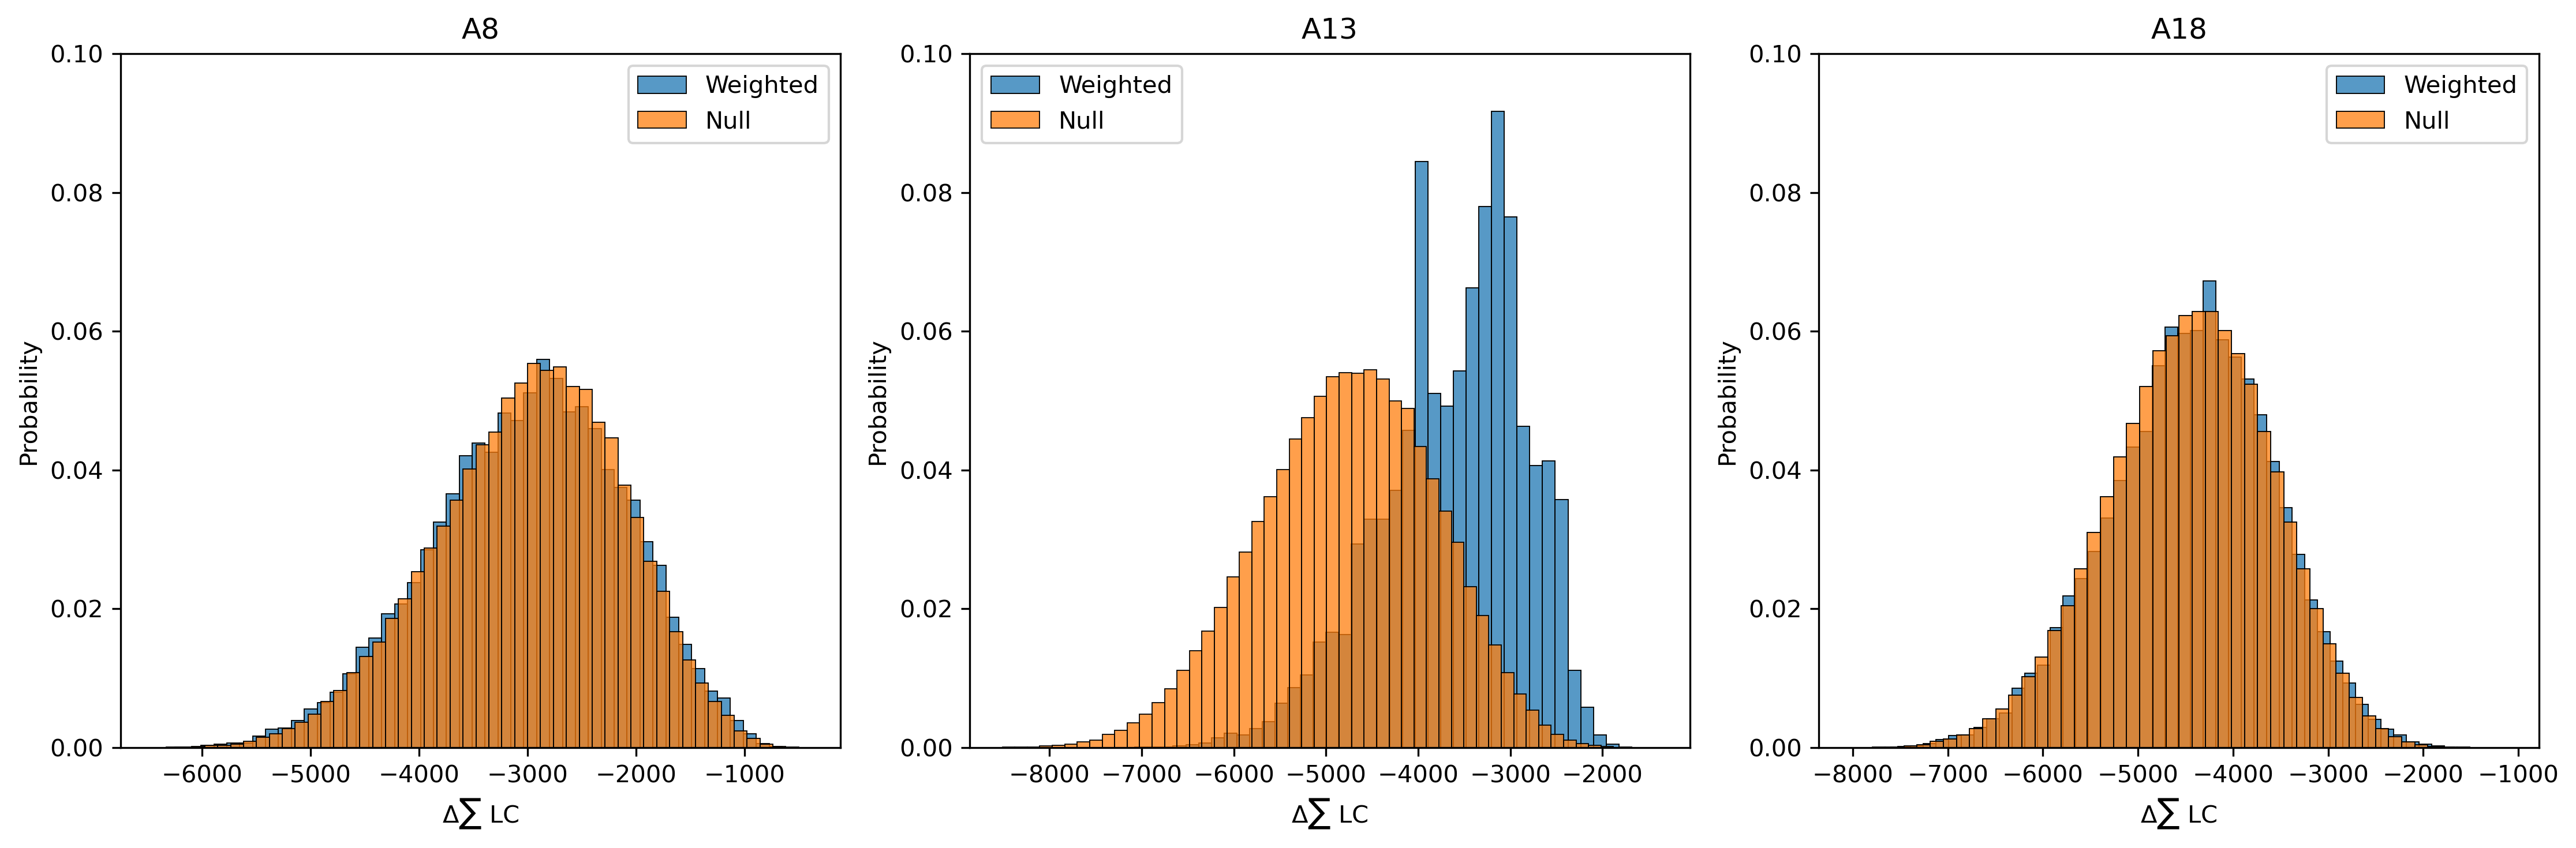

In [3]:
from scipy import stats
beta=0.593**-1
titles = ['A8','A13','A18']
fig,axes = plt.subplots(1,3,figsize=(15,5),dpi=300)
for i,ax in enumerate(axes.flat):
    mp=titles[i]
    if i == 0:
        x=4
    else:
        x=6
    lc= np.loadtxt(f'{mp}_dLC.log',usecols=x)
    en = pd.read_csv(f'{mp}out100Msteps.traj',delim_whitespace=True)
    en.dlc=lc
    x1=en[en['k']==0]['dlc'].values
    x2=en[en['k']==5]['dlc'].values
    sns.histplot(data=en,x=en[en['k']==0]['dlc'],weights=np.exp(-beta*en[en['k']==0]['energy']),
            stat='probability',palette='colorblind',multiple='stack',bins=50,label='Weighted',ax=ax)
    sns.histplot(data=en,x=en[en['k']==5]['dlc'],stat='probability',
             palette='colorblind',multiple='stack',bins=50,label='Null',ax=ax)
    ax.set_title(mp)
    ax.set_xlabel('$\Delta \sum$ LC')
    ax.legend()
    ax.set_ylim(0,0.1)
fig.tight_layout()
fig.savefig('laplacian_centrality.pdf',dpi=300)